In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from fast_glcm import fast_glcm, fast_glcm_mean, fast_glcm_std, fast_glcm_contrast, fast_glcm_dissimilarity, fast_glcm_entropy, fast_glcm_homogeneity
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_extractor, geometry_extractor, linear_fn, curved, CLAHE, contour_extractor, seperate_chanel

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (1).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (3).JPG'


plt.rcParams['figure.dpi'] = 102.46

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

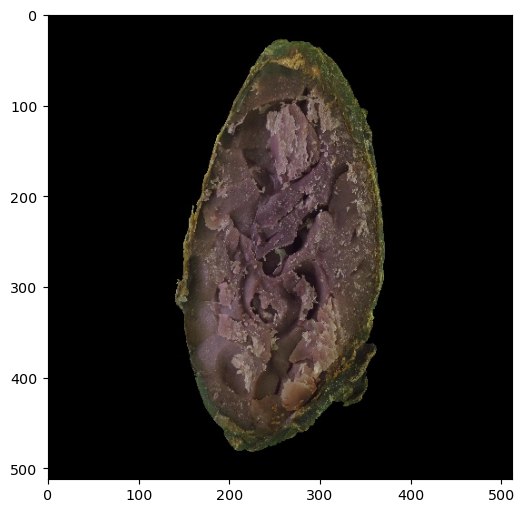

In [89]:
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_rgb)
plt.show()

In [90]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = apply_lut(image_hsv, 2, lut2)   #tang brightness
image_hsv = apply_lut(image_hsv, 1, lut1)   #tang Sat
image_hsv = hsv_filter(image_hsv)

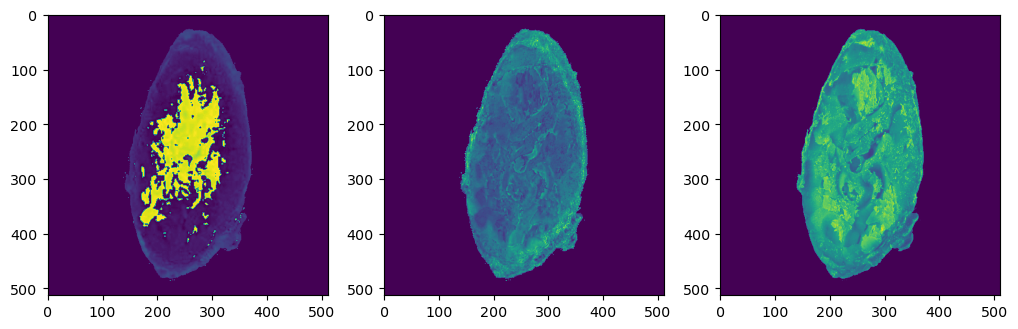

In [91]:
plt.rcParams["figure.figsize"] = (12,6)
h,s,v = seperate_chanel(image_hsv, plot=True)

In [92]:
v = CLAHE(v, grey=True)

(512, 512, 3)


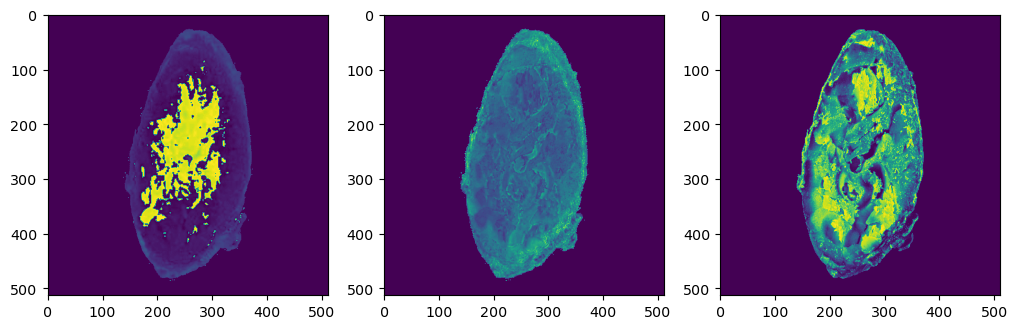

In [93]:
k = np.stack([h,s,v], axis=2)
print(np.shape(k))
tp = seperate_chanel(k, plot=True)

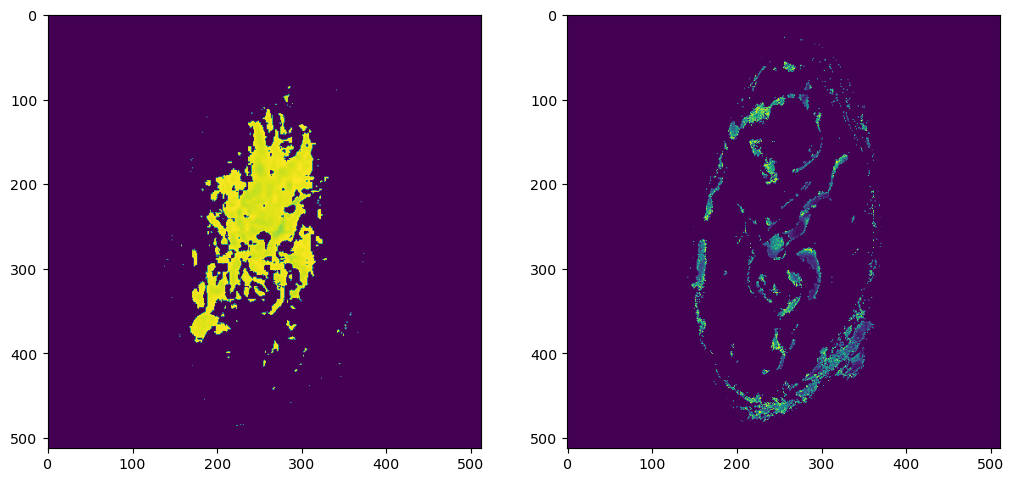

In [94]:
ret, thresh_h = cv2.threshold(h, 60,255,cv2.THRESH_TOZERO)
ret, thresh_v = cv2.threshold(v, 30,255,cv2.THRESH_TOZERO_INV)
plt.subplot(1,2,1)
plt.imshow(thresh_h)
plt.subplot(1,2,2)
plt.imshow(thresh_v)
plt.show()

In [95]:
contour_H = contour_extractor(thresh_h)
for cnt in contour_H:
    convexHull = cv2.convexHull(cnt)
    convexhull_area = cv2.contourArea(convexHull)
    if convexhull_area>500:
        cv2.drawContours(origin_rgb, [convexHull], -1, (255, 255, 0), 2)

contour_V = contour_extractor(thresh_v)
for cnt in contour_V:
    convexHull = cv2.convexHull(cnt)
    convexhull_area = cv2.contourArea(convexHull)
    if convexhull_area>500:
        cv2.drawContours(origin_rgb, [convexHull], -1, (0, 255, 255), 2)

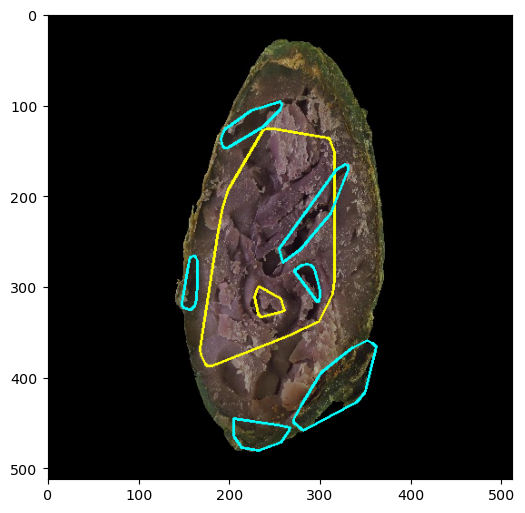

In [96]:
# origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_rgb)
plt.show()